**Gender Classificaton:**

**Name: Sadaf Younes**


Importing the Dependencies

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

Data Collection and Analysis
Kaggle Gender Classification Dataset

In [ ]:
# loading the gender classification dataset to a pandas DataFrame
gender_dataset = pd.read_csv('/content/gender_classification_Logistic Regression.csv')

In [ ]:
# printing the first 5 rows of the dataset
gender_dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [ ]:
# number of rows and Columns in this dataset
gender_dataset.shape

(5001, 8)

In [ ]:
# getting the statistical measures of the data
gender_dataset.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.50030
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
gender_dataset['gender'].value_counts()

1    2502
0    2499
Name: gender, dtype: int64

0 --> Male

1 --> Female

In [ ]:
gender_dataset.groupby('gender').mean()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
0,0.865946,13.552141,6.096359,0.873149,0.880352,0.864746,0.876351
1,0.873301,12.811271,5.796443,0.115108,0.135891,0.121902,0.121902


In [ ]:
# separating the data and labels
features = gender_dataset.drop(columns = 'gender', axis=1)
target = gender_dataset['gender']

In [ ]:
print(features)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_l

In [ ]:
print(target)

0       1
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(features)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(features)

In [ ]:
print(standardized_data)

[[ 0.38719442 -1.24793291  0.28397148 ... -1.01592361  1.01389375
   1.00220198]
 [-2.58268182  0.73938869 -1.00941773 ... -1.01592361  1.01389375
  -0.99780285]
 [-2.58268182 -1.24793291  0.65351125 ...  0.98432598  1.01389375
   1.00220198]
 ...
 [ 0.38719442 -0.25427211 -0.45510807 ... -1.01592361 -0.98629664
  -0.99780285]
 [ 0.38719442  0.01672629  0.46874136 ... -1.01592361 -0.98629664
  -0.99780285]
 [ 0.38719442  2.00404789 -1.00941773 ...  0.98432598  1.01389375
   1.00220198]]


In [ ]:
features = standardized_data
target = gender_dataset['gender']

In [ ]:
print(features)
print(target)

[[ 0.38719442 -1.24793291  0.28397148 ... -1.01592361  1.01389375
   1.00220198]
 [-2.58268182  0.73938869 -1.00941773 ... -1.01592361  1.01389375
  -0.99780285]
 [-2.58268182 -1.24793291  0.65351125 ...  0.98432598  1.01389375
   1.00220198]
 ...
 [ 0.38719442 -0.25427211 -0.45510807 ... -1.01592361 -0.98629664
  -0.99780285]
 [ 0.38719442  0.01672629  0.46874136 ... -1.01592361 -0.98629664
  -0.99780285]
 [ 0.38719442  2.00404789 -1.00941773 ...  0.98432598  1.01389375
   1.00220198]]
0       1
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [ ]:
print(features.shape, X_train.shape, X_test.shape)

(5001, 7) (4000, 7) (1001, 7)


Training the Model

In [ ]:
#Applying the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)


In [ ]:
#training the support vector Machine Classifier
model.fit(X_train, Y_train)



RandomForestClassifier(max_features='sqrt')

5-fold Cross Validation

In [ ]:
#Using 5fold cross validation method on training data
train_score = cross_val_score(model, X_train, Y_train, scoring="accuracy", cv= 5 )
train_score

array([0.97   , 0.96625, 0.975  , 0.96875, 0.96   ])

In [ ]:
#Using 5fold cross validation method on testing data
test_score = cross_val_score(model, X_test, Y_test, scoring="accuracy", cv= 5 )
test_score

array([0.97014925, 0.98      , 0.98      , 0.955     , 0.98      ])

Making a Predictive System


In [ ]:
input_data = (0,11.4,6.7,1,0,1,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is a male')
else:
  print('The person is female')

[[-2.58268182 -1.60926411  1.3925908   1.01227287 -1.01592361  1.01389375
   1.00220198]]
[0]
The person is a male


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Visualization


[Text(0.4543918918918919, 0.9705882352941176, 'nose_long <= -0.016\ngini = 0.5\nsamples = 2542\nvalue = [2008, 1992]\nclass = male'),
 Text(0.16103603603603603, 0.9117647058823529, 'distance_nose_to_lip_long <= 0.002\ngini = 0.203\nsamples = 1231\nvalue = [224, 1728]\nclass = female'),
 Text(0.04617117117117117, 0.8529411764705882, 'nose_wide <= 0.012\ngini = 0.034\nsamples = 975\nvalue = [27, 1521]\nclass = female'),
 Text(0.018018018018018018, 0.7941176470588235, 'forehead_width_cm <= 1.236\ngini = 0.005\nsamples = 841\nvalue = [3, 1327]\nclass = female'),
 Text(0.009009009009009009, 0.7352941176470589, 'gini = 0.0\nsamples = 839\nvalue = [0, 1327]\nclass = female'),
 Text(0.02702702702702703, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]\nclass = male'),
 Text(0.07432432432432433, 0.7941176470588235, 'lips_thin <= 0.014\ngini = 0.196\nsamples = 134\nvalue = [24, 194]\nclass = female'),
 Text(0.04504504504504504, 0.7352941176470589, 'forehead_width_cm <= 1.327\ngini = 

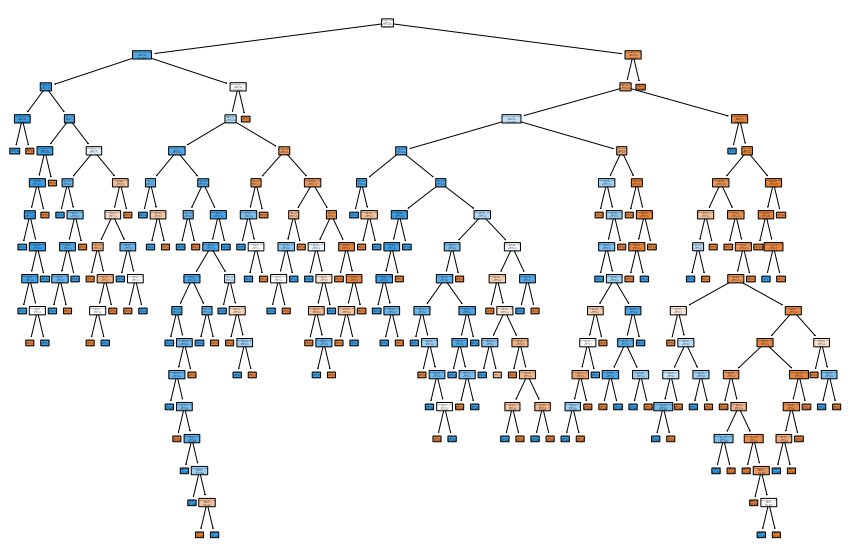

In [ ]:
#Visualizing the Random Forest according to tree graphs
fn=['long_hair',	'forehead_width_cm',	'forehead_height_cm',	'nose_wide',	'nose_long'	,'lips_thin',	'distance_nose_to_lip_long']
cn=['male', 'female']
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0],
          feature_names=fn,
          class_names=cn,
          filled=True, impurity=True,
          rounded=True)
